# Simple Hotel Booking EDA

Easy-to-understand analysis with clear visualizations

## 1. Import Libraries & Load Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data
df = pd.read_csv('../data/hotel_bookings.csv')

print(f"Dataset has {len(df):,} bookings")
print(f"Cancellation rate: {df['is_canceled'].mean()*100:.1f}%")
df.head()

Dataset has 119,390 bookings
Cancellation rate: 37.0%


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


## 2. Cancellation Overview

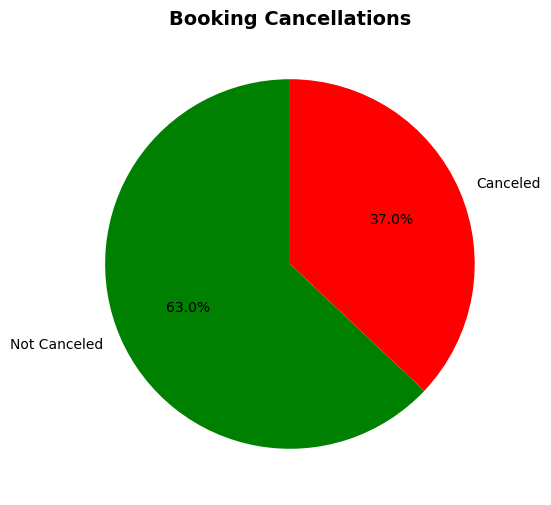

In [2]:
# Cancellation pie chart
plt.figure(figsize=(8, 6))
cancel_counts = df['is_canceled'].value_counts()
plt.pie(cancel_counts, labels=['Not Canceled', 'Canceled'], autopct='%1.1f%%', 
        colors=['green', 'red'], startangle=90)
plt.title('Booking Cancellations', size=14, weight='bold')
plt.show()

## 3. Hotel Types

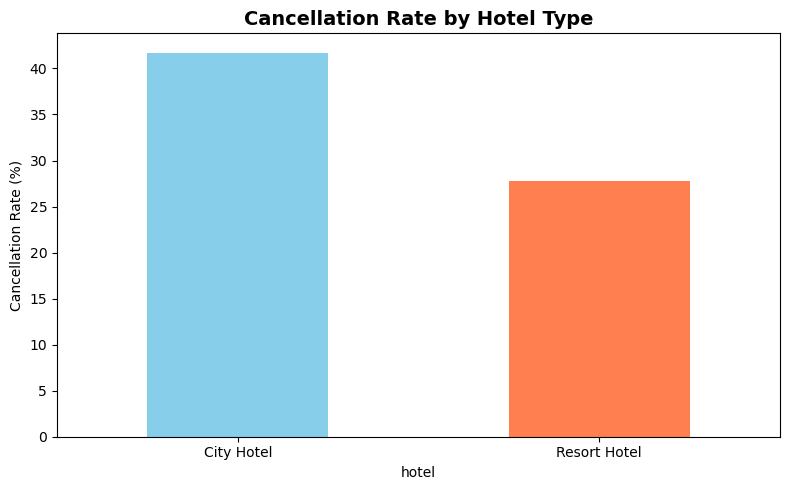


Cancellation rates:
hotel
City Hotel      41.726963
Resort Hotel    27.763355
Name: is_canceled, dtype: float64


In [3]:
# Cancellation by hotel type
hotel_data = df.groupby('hotel')['is_canceled'].mean() * 100

plt.figure(figsize=(8, 5))
hotel_data.plot(kind='bar', color=['skyblue', 'coral'])
plt.title('Cancellation Rate by Hotel Type', size=14, weight='bold')
plt.ylabel('Cancellation Rate (%)')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print("\nCancellation rates:")
print(hotel_data)

## 4. Booking Trends by Month

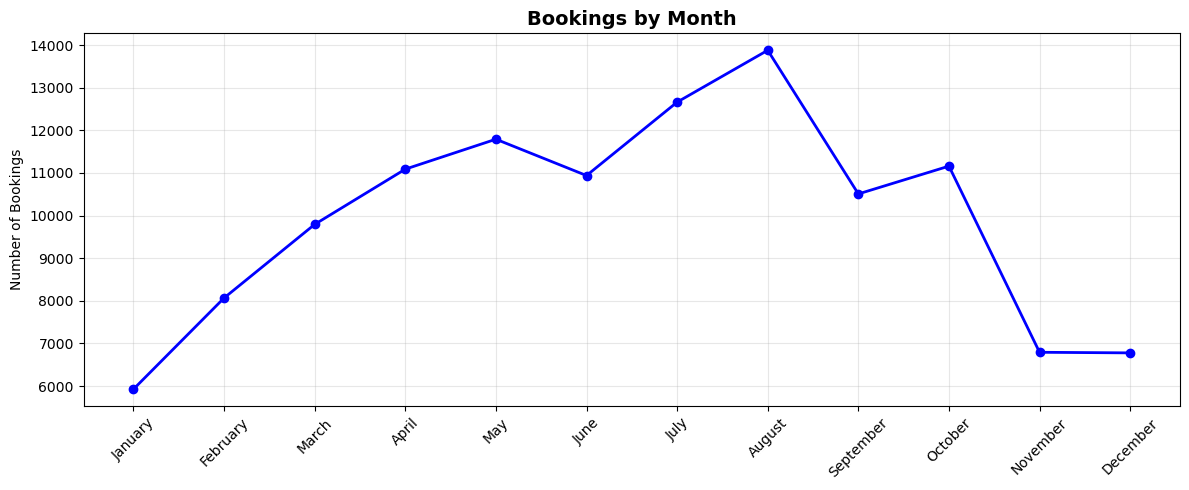

In [4]:
# Bookings per month
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
month_counts = df['arrival_date_month'].value_counts().reindex(month_order)

plt.figure(figsize=(12, 5))
plt.plot(month_order, month_counts.values, marker='o', linewidth=2, color='blue')
plt.title('Bookings by Month', size=14, weight='bold')
plt.ylabel('Number of Bookings')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

## 5. Lead Time Analysis

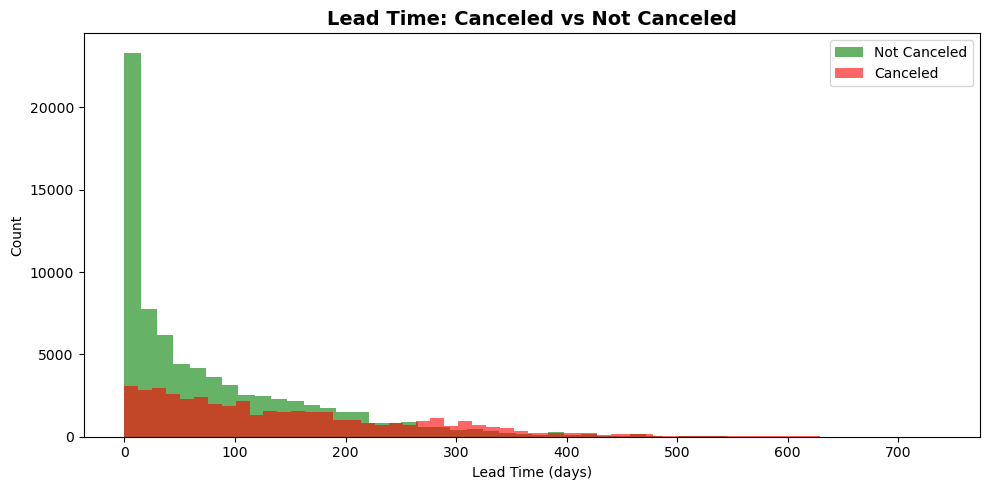

Average lead time (not canceled): 80.0 days
Average lead time (canceled): 144.8 days


In [5]:
# Lead time comparison
plt.figure(figsize=(10, 5))
plt.hist(df[df['is_canceled']==0]['lead_time'], bins=50, alpha=0.6, label='Not Canceled', color='green')
plt.hist(df[df['is_canceled']==1]['lead_time'], bins=50, alpha=0.6, label='Canceled', color='red')
plt.title('Lead Time: Canceled vs Not Canceled', size=14, weight='bold')
plt.xlabel('Lead Time (days)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Average lead time (not canceled): {df[df['is_canceled']==0]['lead_time'].mean():.1f} days")
print(f"Average lead time (canceled): {df[df['is_canceled']==1]['lead_time'].mean():.1f} days")

## 6. Market Segments

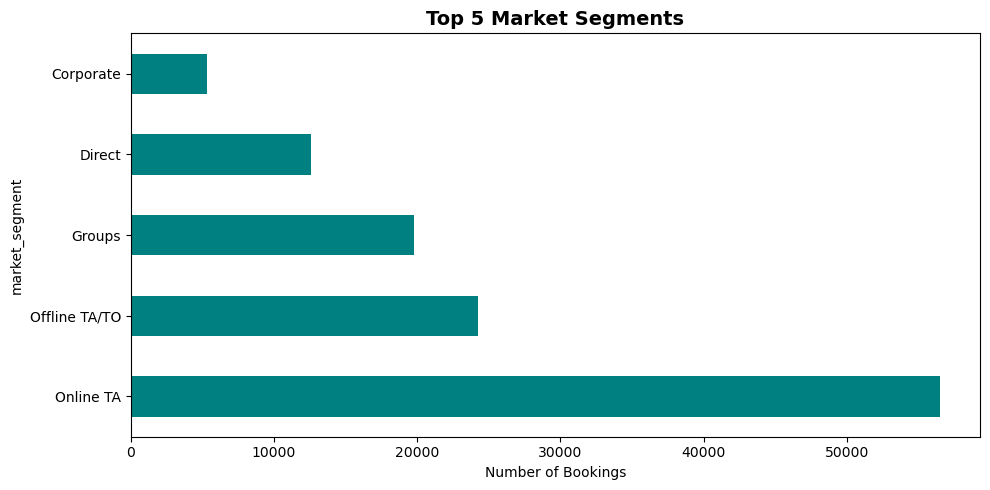

In [6]:
# Top 5 market segments
top_segments = df['market_segment'].value_counts().head(5)

plt.figure(figsize=(10, 5))
top_segments.plot(kind='barh', color='teal')
plt.title('Top 5 Market Segments', size=14, weight='bold')
plt.xlabel('Number of Bookings')
plt.tight_layout()
plt.show()

## 7. Average Daily Rate (ADR)

In [ ]:
# ADR distribution
adr_data = df[df['adr'] > 0]['adr']

plt.figure(figsize=(10, 5))
plt.hist(adr_data, bins=50, color='gold', edgecolor='black')
plt.title('Average Daily Rate Distribution', size=14, weight='bold')
plt.xlabel('ADR ($)')
plt.ylabel('Count')
plt.axvline(adr_data.mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: ${adr_data.mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

## 8. Key Correlations

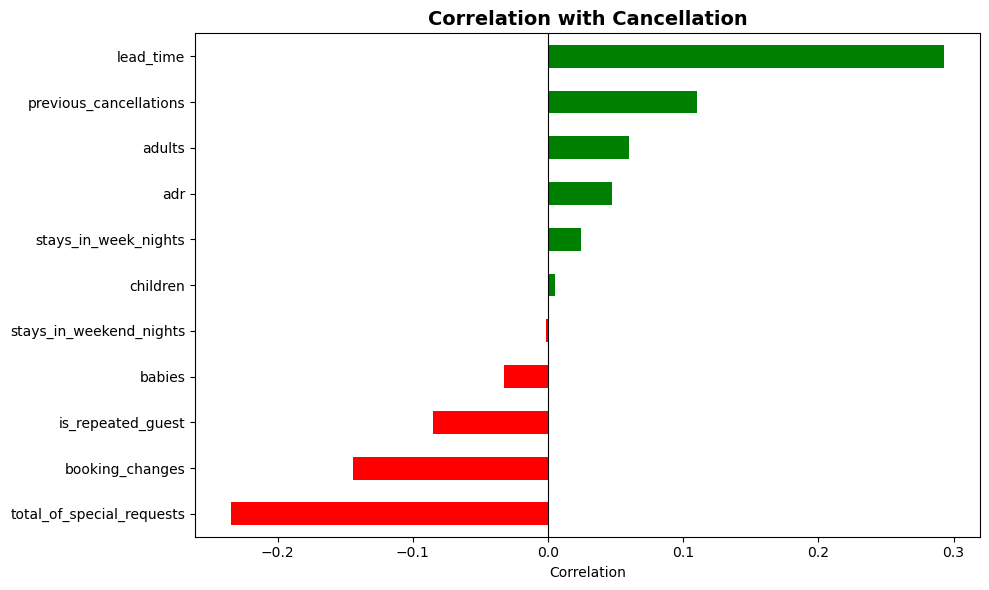

In [8]:
# Correlation with cancellation
numerical_cols = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights',
                  'adults', 'children', 'babies', 'is_repeated_guest',
                  'previous_cancellations', 'booking_changes', 'adr',
                  'total_of_special_requests']

corr_data = df[numerical_cols + ['is_canceled']].corr()['is_canceled'].drop('is_canceled').sort_values()

plt.figure(figsize=(10, 6))
corr_data.plot(kind='barh', color=['red' if x < 0 else 'green' for x in corr_data])
plt.title('Correlation with Cancellation', size=14, weight='bold')
plt.xlabel('Correlation')
plt.axvline(0, color='black', linewidth=0.8)
plt.tight_layout()
plt.show()

## 9. Key Insights Summary

In [9]:
print("=" * 60)
print("KEY INSIGHTS")
print("=" * 60)

print(f"\n1. Total Bookings: {len(df):,}")
print(f"2. Cancellation Rate: {df['is_canceled'].mean()*100:.1f}%")
print(f"3. Average Lead Time: {df['lead_time'].mean():.0f} days")
print(f"4. Average Price (ADR): ${df[df['adr']>0]['adr'].mean():.2f}")
print(f"5. Most Canceled Month: {df[df['is_canceled']==1]['arrival_date_month'].value_counts().index[0]}")
print(f"6. Busiest Month: {df['arrival_date_month'].value_counts().index[0]}")

print("\n" + "=" * 60)
print("✓ EDA Complete!")

KEY INSIGHTS

1. Total Bookings: 119,390
2. Cancellation Rate: 37.0%
3. Average Lead Time: 104 days
4. Average Price (ADR): $103.53
5. Most Canceled Month: August
6. Busiest Month: August

✓ EDA Complete!


In [ ]:
# Number of guests distribution
df['total_guests'] = df['adults'] + df['children'].fillna(0) + df['babies']

plt.figure(figsize=(10, 5))
plt.hist(df['total_guests'], bins=15, color='purple', edgecolor='black')
plt.title('Number of Guests per Booking', size=14, weight='bold')
plt.xlabel('Total Guests')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print(f"Average guests per booking: {df['total_guests'].mean():.2f}")

## 8. Stay Duration

In [ ]:
# Stay duration analysis
df['total_nights'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Total nights histogram
axes[0].hist(df['total_nights'], bins=30, color='orange', edgecolor='black')
axes[0].set_title('Stay Duration Distribution', size=14, weight='bold')
axes[0].set_xlabel('Total Nights')
axes[0].set_ylabel('Count')

# Weekend vs weekday
stay_data = pd.DataFrame({
    'Weekend Nights': [df['stays_in_weekend_nights'].sum()],
    'Week Nights': [df['stays_in_week_nights'].sum()]
})
stay_data.T.plot(kind='bar', ax=axes[1], color=['skyblue', 'coral'], legend=False)
axes[1].set_title('Weekend vs Weekday Stays', size=14, weight='bold')
axes[1].set_ylabel('Total Nights')
axes[1].set_xticklabels(['Weekend', 'Weekday'], rotation=0)

plt.tight_layout()
plt.show()

print(f"Average stay: {df['total_nights'].mean():.2f} nights")

## 9. Customer Types

In [ ]:
# Customer type distribution
customer_counts = df['customer_type'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
axes[0].bar(customer_counts.index, customer_counts.values, color='steelblue')
axes[0].set_title('Bookings by Customer Type', size=14, weight='bold')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Cancellation rate
customer_cancel = df.groupby('customer_type')['is_canceled'].mean() * 100
axes[1].bar(customer_cancel.index, customer_cancel.values, color='crimson')
axes[1].set_title('Cancellation Rate by Customer Type', size=14, weight='bold')
axes[1].set_ylabel('Cancellation Rate (%)')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

## 10. Deposit Type Impact

In [ ]:
# Deposit type vs cancellation
deposit_cancel = df.groupby('deposit_type')['is_canceled'].mean() * 100

plt.figure(figsize=(10, 5))
deposit_cancel.plot(kind='bar', color=['green', 'orange', 'red'])
plt.title('Cancellation Rate by Deposit Type', size=14, weight='bold')
plt.ylabel('Cancellation Rate (%)')
plt.xlabel('Deposit Type')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("\nCancellation rates by deposit type:")
print(deposit_cancel)

## 11. Meal Preferences

In [ ]:
# Meal type distribution
meal_counts = df['meal'].value_counts()

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
axes[0].bar(meal_counts.index, meal_counts.values, color='teal')
axes[0].set_title('Bookings by Meal Type', size=14, weight='bold')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)

# Pie chart
axes[1].pie(meal_counts.values, labels=meal_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Meal Type Distribution', size=14, weight='bold')

plt.tight_layout()
plt.show()

## 12. Special Requests

In [ ]:
# Special requests analysis
plt.figure(figsize=(10, 5))
plt.hist(df['total_of_special_requests'], bins=10, color='gold', edgecolor='black')
plt.title('Special Requests Distribution', size=14, weight='bold')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

# Impact on cancellation
with_requests = df[df['total_of_special_requests'] > 0]['is_canceled'].mean() * 100
without_requests = df[df['total_of_special_requests'] == 0]['is_canceled'].mean() * 100

print(f"\nCancellation rate WITH special requests: {with_requests:.1f}%")
print(f"Cancellation rate WITHOUT special requests: {without_requests:.1f}%")

## 13. Repeated Guests

In [ ]:
# Repeated vs new guests
repeated_data = df['is_repeated_guest'].value_counts()
repeated_labels = ['New Guest', 'Repeated Guest']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Count
axes[0].bar(repeated_labels, repeated_data.values, color=['blue', 'green'])
axes[0].set_title('New vs Repeated Guests', size=14, weight='bold')
axes[0].set_ylabel('Count')

# Cancellation comparison
cancel_new = df[df['is_repeated_guest']==0]['is_canceled'].mean() * 100
cancel_repeated = df[df['is_repeated_guest']==1]['is_canceled'].mean() * 100
axes[1].bar(repeated_labels, [cancel_new, cancel_repeated], color=['orange', 'red'])
axes[1].set_title('Cancellation Rate: New vs Repeated', size=14, weight='bold')
axes[1].set_ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

print(f"\nRepeated guests: {(df['is_repeated_guest']==1).sum():,} ({(df['is_repeated_guest']==1).mean()*100:.1f}%)")

## 14. Booking Changes

In [ ]:
# Booking changes analysis
plt.figure(figsize=(10, 5))
plt.hist(df['booking_changes'], bins=15, color='purple', edgecolor='black')
plt.title('Booking Changes Distribution', size=14, weight='bold')
plt.xlabel('Number of Changes')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

print(f"Average booking changes: {df['booking_changes'].mean():.2f}")
print(f"Bookings with changes: {(df['booking_changes'] > 0).sum():,}")

## 15. Arrival Year Trends

In [ ]:
# Year-over-year comparison
year_data = df.groupby('arrival_date_year').agg({
    'is_canceled': ['count', 'sum', 'mean']
}).reset_index()
year_data.columns = ['Year', 'Total', 'Canceled', 'Cancel_Rate']

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Total bookings
axes[0].bar(year_data['Year'], year_data['Total'], color='skyblue')
axes[0].set_title('Total Bookings by Year', size=14, weight='bold')
axes[0].set_ylabel('Number of Bookings')
axes[0].set_xlabel('Year')

# Cancellation rate
axes[1].plot(year_data['Year'], year_data['Cancel_Rate']*100, marker='o', linewidth=2, color='red', markersize=10)
axes[1].set_title('Cancellation Rate by Year', size=14, weight='bold')
axes[1].set_ylabel('Cancellation Rate (%)')
axes[1].set_xlabel('Year')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 16. Distribution Channels

In [ ]:
# Distribution channel analysis
channel_counts = df['distribution_channel'].value_counts()

plt.figure(figsize=(10, 5))
channel_counts.plot(kind='barh', color='teal')
plt.title('Bookings by Distribution Channel', size=14, weight='bold')
plt.xlabel('Number of Bookings')
plt.ylabel('Channel')
plt.tight_layout()
plt.show()

print(f"\nMost popular channel: {channel_counts.index[0]} ({channel_counts.values[0]:,} bookings)")

## 17. Previous Cancellations

In [ ]:
# Previous cancellation history
has_previous = df[df['previous_cancellations'] > 0]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Distribution
axes[0].hist(df['previous_cancellations'], bins=20, color='crimson', edgecolor='black')
axes[0].set_title('Previous Cancellations Distribution', size=14, weight='bold')
axes[0].set_xlabel('Previous Cancellations')
axes[0].set_ylabel('Count')

# Impact on current cancellation
cancel_with_history = has_previous['is_canceled'].mean() * 100
cancel_no_history = df[df['previous_cancellations']==0]['is_canceled'].mean() * 100
axes[1].bar(['No History', 'Has History'], [cancel_no_history, cancel_with_history], 
            color=['green', 'red'])
axes[1].set_title('Cancellation: With vs Without History', size=14, weight='bold')
axes[1].set_ylabel('Cancellation Rate (%)')

plt.tight_layout()
plt.show()

print(f"\nGuests with previous cancellations: {len(has_previous):,}")

## 18. ADR vs Cancellation

In [ ]:
# ADR comparison: canceled vs not canceled
adr_not_canceled = df[(df['is_canceled']==0) & (df['adr']>0) & (df['adr']<500)]['adr']
adr_canceled = df[(df['is_canceled']==1) & (df['adr']>0) & (df['adr']<500)]['adr']

plt.figure(figsize=(10, 5))
plt.hist(adr_not_canceled, bins=50, alpha=0.6, label='Not Canceled', color='green')
plt.hist(adr_canceled, bins=50, alpha=0.6, label='Canceled', color='red')
plt.title('ADR: Canceled vs Not Canceled', size=14, weight='bold')
plt.xlabel('ADR ($)')
plt.ylabel('Count')
plt.legend()
plt.tight_layout()
plt.show()

print(f"Average ADR (not canceled): ${adr_not_canceled.mean():.2f}")
print(f"Average ADR (canceled): ${adr_canceled.mean():.2f}")

## 19. Parking Spaces

In [ ]:
# Parking space requirements
parking_counts = df['required_car_parking_spaces'].value_counts().sort_index()

plt.figure(figsize=(10, 5))
parking_counts.plot(kind='bar', color='steelblue')
plt.title('Parking Space Requirements', size=14, weight='bold')
plt.xlabel('Number of Parking Spaces')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

print(f"Bookings requiring parking: {(df['required_car_parking_spaces']>0).sum():,}")